In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

str_path_file = "data/clean_car_prices/clean_car_prices.csv"
car_prices = pd.read_csv(str_path_file)

In [65]:
car_prices=car_prices.loc[car_prices['saledate'].str.len()>5]
car_prices=car_prices.loc[~car_prices['odometer'].isnull()]

clean_df=car_prices.copy()
clean_df['saleyear']=clean_df['saledate'].str[11:15].astype('int')

In [66]:
clean_df['pct_mmr']=clean_df['sellingprice']/clean_df['mmr']
clean_df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,saleyear,pct_mmr
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014,1.048780
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014,1.033654
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),2015,0.940439
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),2015,1.009091
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),2014,1.015152


In [67]:
clean_df['age_when_sold'] = clean_df['saleyear'] - clean_df['year']
clean_df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,saleyear,pct_mmr,age_when_sold
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014,1.048780,-1
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014,1.033654,-1
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),2015,0.940439,1
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),2015,1.009091,0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),2014,1.015152,0


-0.582415318112417


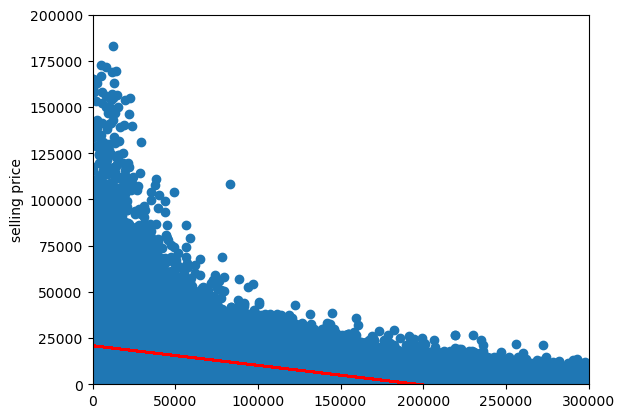

In [112]:
#scatter plot of odometer vs selling price in terms of all makes
x_values=clean_df['odometer']
y_values=clean_df['sellingprice']

plt.scatter(x_values, y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.ylabel("selling price")
plt.ylim(0,200000)
plt.xlim(0,300000)

plt.plot(x_values,regress_values,"r-")
print(rvalue)

-0.5840474835640612


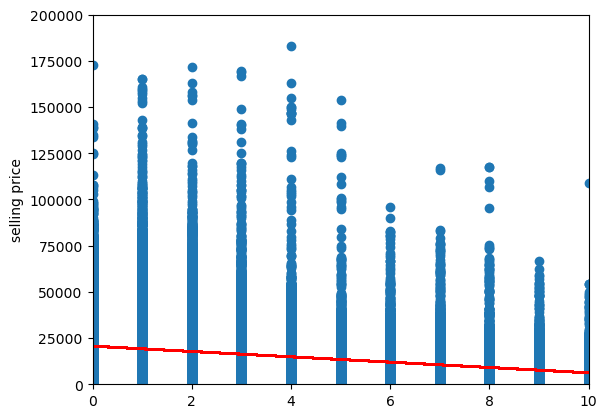

In [113]:
#scatter plot of age_when_sold vs selling price in terms of all makes

x_values=clean_df['age_when_sold']
y_values=clean_df['sellingprice']

plt.scatter(x_values, y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.ylabel("selling price")
plt.ylim(0,200000)
plt.xlim(0,10)

plt.plot(x_values,regress_values,"r-")
print(rvalue)

-0.7495986854129921


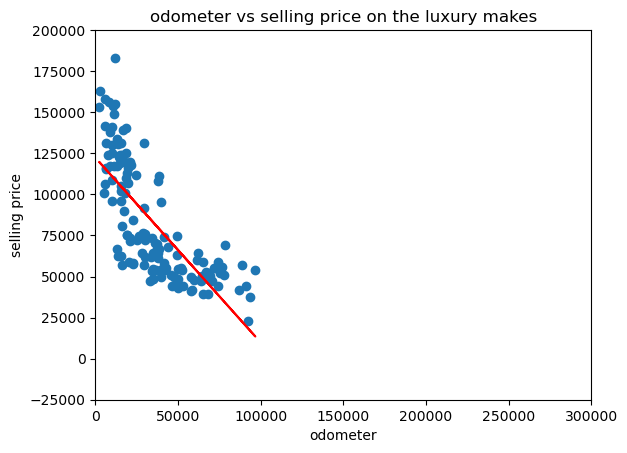

In [116]:
#scatter plot of odometer vs selling price in terms of luxury make
luxury_make=['Ferrari', 'Lamborghini', 'Bentley']
luxury_df=clean_df.loc[(clean_df['odometer']<300000) & (clean_df['make'].isin(luxury_make))]

x_values=luxury_df['odometer']
y_values=luxury_df['sellingprice']

plt.scatter(x_values, y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.ylabel("selling price")
plt.xlabel("odometer")
plt.title("odometer vs selling price on the luxury makes")
plt.ylim(-25000,200000)
plt.xlim(0,300000)

plt.plot(x_values,regress_values,"r-")
print(rvalue)

-0.5877115274012035


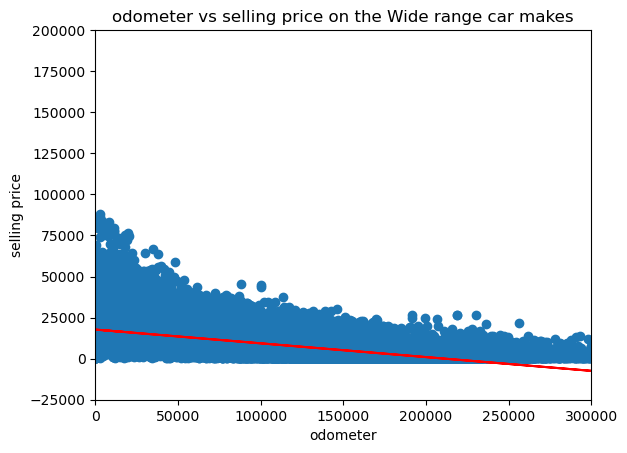

In [118]:
#scatter plot of odometer vs selling price in terms of Wide range car make
wide_range_make=["Chevrolet","Nissan","Toyota"]
wide_range_df=clean_df.loc[(clean_df['odometer']<300000) & (clean_df['make'].isin(wide_range_make))]

x_values=wide_range_df['odometer']
y_values=wide_range_df['sellingprice']

plt.scatter(x_values, y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.ylabel("selling price")
plt.xlabel("odometer")
plt.title("odometer vs selling price on the Wide range car makes")
plt.ylim(-25000,200000)
plt.xlim(0,300000)

plt.plot(x_values,regress_values,"r-")
print(rvalue)

-0.747592255278216


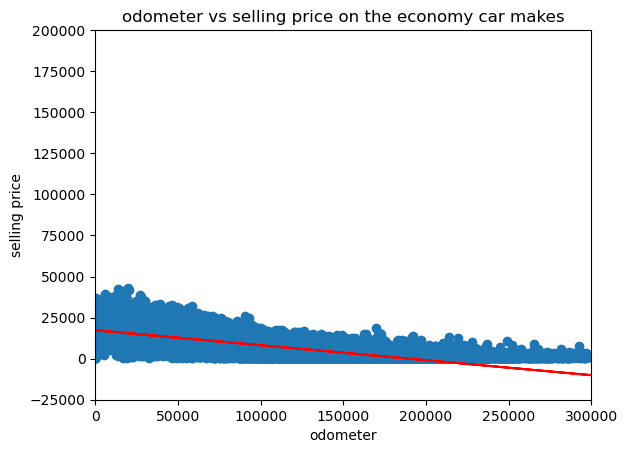

In [119]:
#scatter plot of odometer vs selling price in terms of economy car make
economy_make=["Volkswagen","Honda","Chrysler"]
economy_df=clean_df.loc[(clean_df['odometer']<300000) & (clean_df['make'].isin(economy_make))]


x_values=economy_df['odometer']
y_values=economy_df['sellingprice']

plt.scatter(x_values, y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.ylabel("selling price")
plt.xlabel("odometer")
plt.title("odometer vs selling price on the economy car makes")
plt.ylim(-25000,200000)
plt.xlim(0,300000)

plt.plot(x_values,regress_values,"r-")
print(rvalue)

-0.8603436462084547


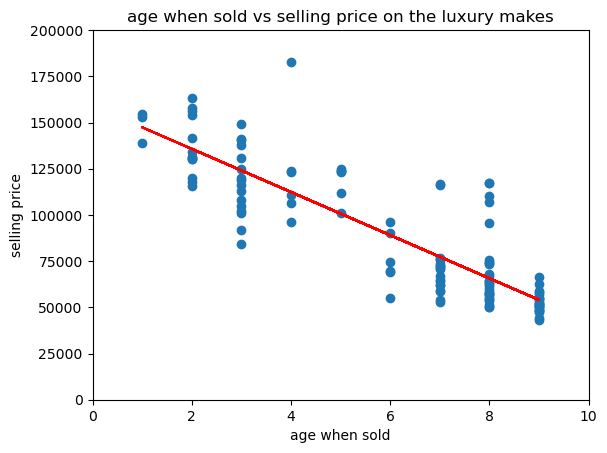

In [111]:
#scatter plot of age when sold vs selling price in terms of luxury make

luxury_make=['Ferrari', 'Lamborghini', 'Bentley']
luxury_df=clean_df.loc[(clean_df['age_when_sold']<10) & (clean_df['make'].isin(luxury_make))]

x_values=luxury_df['age_when_sold']
y_values=luxury_df['sellingprice']

plt.scatter(x_values, y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.ylabel("selling price")
plt.xlabel("age when sold")
plt.title("age when sold vs selling price on the luxury makes")

plt.ylim(0,200000)
plt.xlim(0,10)

plt.plot(x_values,regress_values,"r-")
print(rvalue)

-0.47095020409834837


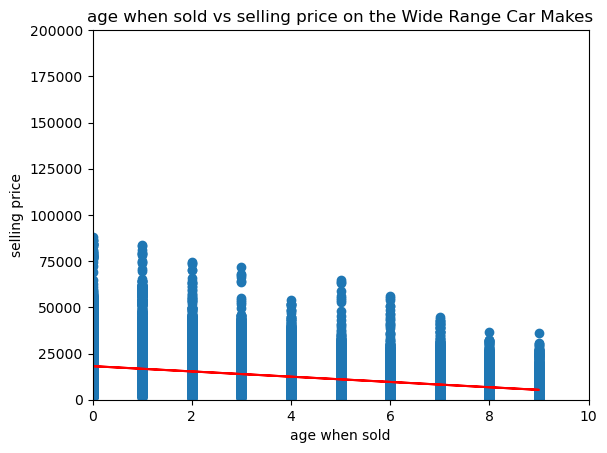

In [110]:
#scatter plot of age when sold vs selling price in terms of Wide Range Car Makes
wide_range_make=["Chevrolet","Nissan","Toyota"]
wide_range_df=clean_df.loc[(clean_df['age_when_sold']<10) & (clean_df['make'].isin(wide_range_make))]

x_values=wide_range_df['age_when_sold']
y_values=wide_range_df['sellingprice']

plt.scatter(x_values, y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.ylabel("selling price")
plt.xlabel("age when sold")
plt.title("age when sold vs selling price on the Wide Range Car Makes")

plt.ylim(0,200000)
plt.xlim(0,10)

plt.plot(x_values,regress_values,"r-")
print(rvalue)



-0.7013132246069556


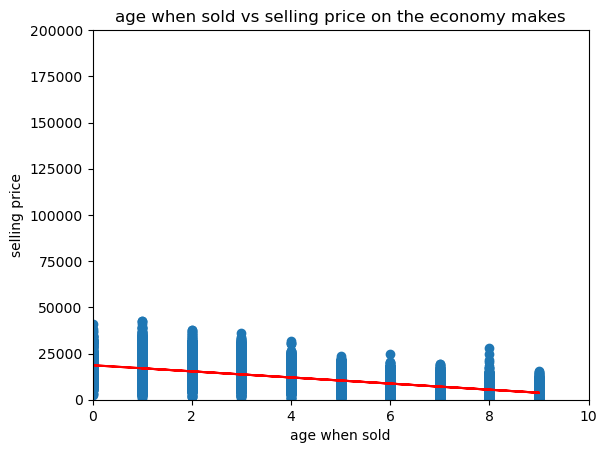

In [109]:
#scatter plot of age when sold vs selling price in terms of economy make

economy_make=["Volkswagen","Honda","Chrysler"]
economy_df=clean_df.loc[(clean_df['age_when_sold']<10) & (clean_df['make'].isin(economy_make))]

x_values=economy_df['age_when_sold']
y_values=economy_df['sellingprice']

plt.scatter(x_values, y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.ylabel("selling price")
plt.xlabel("age when sold")
plt.title("age when sold vs selling price on the economy makes")

plt.ylim(0,200000)
plt.xlim(0,10)

plt.plot(x_values,regress_values,"r-")
print(rvalue)